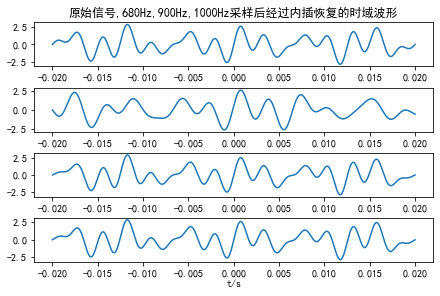

In [1]:
#导入使用的库
import numpy as np
import matplotlib.pyplot as plt

def signfunc(f): #定义信号函数
    f1 = 150;f2 = 325;f3 = 400
    t = np.arange(-0.02,0.02,1/f)
    return t,np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t)

#原始信号
fa = 100000
ta,xa = signfunc(fa)

#对原始信号进行采样
fs1 = 680;fs2 = 900;fs3 = 1000
t1,x_hat1 = signfunc(fs1);t2,x_hat2 = signfunc(fs2);t3,x_hat3 = signfunc(fs3)

def interp_rec(samp_sign,t,ts,fs): #内插恢复函数
    t = t-1e-10 #防止出现分母为0的情况
    t = t.reshape(1,-1);ts = ts.reshape(-1,1)
    th = t-ts;hn = np.sin(np.pi*fs*th)/(np.pi*fs*th)
    return np.dot(samp_sign,hn)

x_hat1_rec = interp_rec(x_hat1,ta,t1,fs1)
x_hat2_rec = interp_rec(x_hat2,ta,t2,fs2)
x_hat3_rec = interp_rec(x_hat3,ta,t3,fs3)

#绘制原信号及各采样信号恢复后的时域波形
fig,ax = plt.subplots(4,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].plot(ta,x_hat1_rec)
ax[2].plot(ta,x_hat2_rec);ax[3].plot(ta,x_hat3_rec)
ax[0].set_title('原始信号,680Hz,900Hz,1000Hz采样后经过内插恢复的时域波形')
ax[3].set_xlabel('t/s')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./samp_interp.png',dpi=500)